Dataset Loading

In [12]:
import pandas as pd

# Load the dataset
file_path_hles = '../../DS2/Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_dog_owner_v1.0.csv'
file_path_afus = '../../DS2/Dataset/SurveyData/SurveyData_CSV_DAP_2021_AFUS_dog_owner_v1.0.csv'
dog_hles = pd.read_csv(file_path_hles, delimiter=',')  # Assuming tab-delimited format based on the file extension
dog_afus = pd.read_csv(file_path_afus, delimiter=',')

/var/folders/fm/gppl2h2d0d10f3vj1qqnr3g00000gn/T/ipykernel_29780/1619273642.py:6: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  dog_hles = pd.read_csv(file_path_hles, delimiter=',')  # Assuming tab-delimited format based on the file extension
/var/folders/fm/gppl2h2d0d10f3vj1qqnr3g00000gn/T/ipykernel_29780/1619273642.py:7: DtypeWarning: Columns (36,38,40,42,44,46,48,50,52,54,56,67,70,73,74,75,80,99,195,199,202,207,209,212,348,354,360,366,521,561,735,743) have mixed types. Specify dtype option on import or set low_memory=False.
  dog_afus = pd.read_csv(file_path_afus, delimiter=',')


Show figure and count

Here dd_age_basis means if owner know exactly dog age

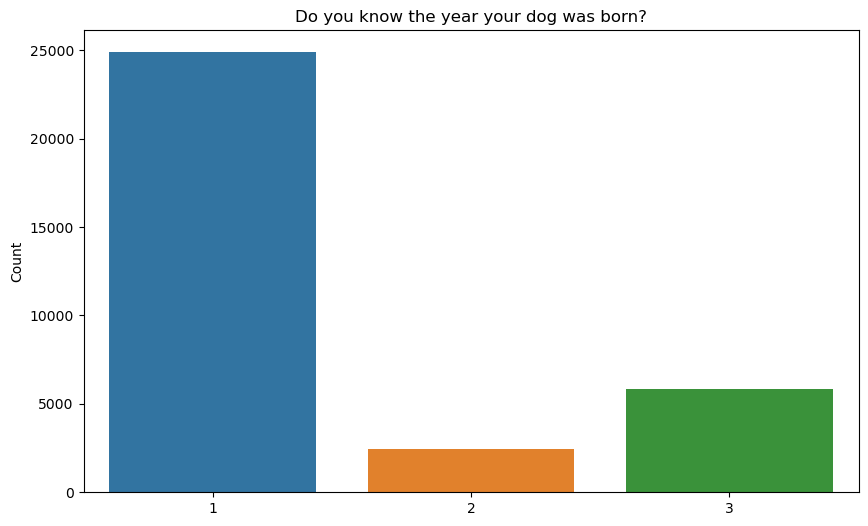

1=Yes, I’m certain , 2 = I think I know how old my dog is, but I’m not sure, 3 = NA 
Counts for each value in 'dd_age_basis':
 dd_age_basis
1    24884
3     5831
2     2457
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Visualizing the age distribution of the dogs
# plt.figure(figsize=(10, 6))
# sns.histplot(dog_hles['dd_age_basis'],  bins=[0.5, 1.5, 2.5, 3.5],kde=False)

age_basis_counts = dog_hles['dd_age_basis'].value_counts(dropna=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=age_basis_counts.index, y=age_basis_counts.values)
plt.title('Do you know the year your dog was born?')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

print("1=Yes, I’m certain , 2 = I think I know how old my dog is, but I’m not sure, 3 = NA ")
print("Counts for each value in 'dd_age_basis':\n", age_basis_counts)

/var/folders/fm/gppl2h2d0d10f3vj1qqnr3g00000gn/T/ipykernel_29780/2789949003.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dog_hles['rounded_age_years'] = filtered_dog_hles['dd_age_years'].round()


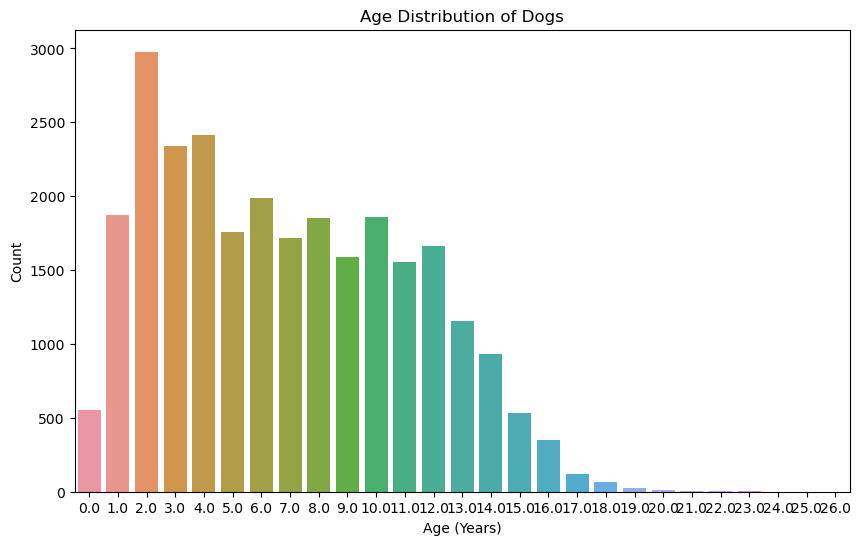

rounded_age_years
2.0     2978
4.0     2413
3.0     2337
6.0     1986
1.0     1872
10.0    1860
8.0     1853
5.0     1755
7.0     1714
12.0    1666
9.0     1590
11.0    1556
13.0    1153
14.0     933
0.0      556
15.0     535
16.0     349
17.0     117
18.0      68
19.0      22
20.0      13
21.0       5
23.0       2
22.0       2
24.0       1
26.0       1
25.0       1
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 筛选出 'dd_age_basis' 为 1 的行，并且 'dd_age_years' 大于等于 0
filtered_dog_hles = dog_hles[((dog_hles['dd_age_basis'] == 1) | (dog_hles['dd_age_basis'] == 2)) & (dog_hles['dd_age_years'] >= 0)]

# 四舍五入年龄值到整数
filtered_dog_hles['rounded_age_years'] = filtered_dog_hles['dd_age_years'].round()

# 创建一个新的 DataFrame，只包含有有效年龄值的行
age_with_id = filtered_dog_hles[['dog_id', 'rounded_age_years']].dropna()

# 将结果保存到 CSV 文件
age_with_id.to_csv('../Common_Code/features/age_with_id.csv', index=False)

# plot
rounded_age_years_count = age_with_id['rounded_age_years'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rounded_age_years_count.index, y=rounded_age_years_count.values)
plt.title('Age Distribution of Dogs')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

print(rounded_age_years_count)
